# Import all kind of stuff

In [37]:
import sys

import numpy as np
from numpy.typing import NDArray

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

from scipy.special import jv

local = "/Users/oliver/Documents/doctoral-thesis/.utilities/"
remote = "/Users/oliver/Documents/p5control-bluefors-evaluation/"
textwidth = 4.25279  # in
textheight = 6.85173 # in

sys.path.append(local)
sys.path.append(remote)

plt.style.use(f'{local}thesisstyle.mplstyle')

from thesislayout import get_figure, theory_layout

from cpd5 import get_color, get_colors, cmap_tinted_black_to_white
from cpd5 import (
    seeblau120,
    seeblau100,
    seeblau80,
    seeblau65,
    seeblau35,
    seeblau20,
)
seeblau = [seeblau120, seeblau100, seeblau65, seeblau35, seeblau20]
from cpd5 import (
    seegrau120,
    seegrau100,
    seegrau80,
    seegrau65,
    seegrau35,
    seegrau20,
)
seegrau = [seegrau120, seegrau100, seegrau65, seegrau35, seegrau20]

from theory.utilities.constants import k_B_meV, G_0_muS, e, h
from theory.utilities.types import NDArray64

from theory.utilities.functions import bin_y_over_x, oversample

# theory
from theory.models.bcs import Delta_meV_of_T
from theory.models.bcs import N_of_E, f_of_E
from theory.models.bcs import get_I_nA as get_I_nA_bcs
from theory.models.tg import get_I_pat_nA as get_I_nA_tg

from theory.models.btk import AB_of_E, Z_of_tau
from theory.models.btk import get_I_nA as get_I_nA_btk
from theory.models.ha_sym import get_I_nA as get_I_nA_ha
from theory.models.fcs_pbar import get_I_nA as get_I_nA_fcs
from theory.models.utg import get_I_nA as get_I_nA_utg

from matplotlib_inline.backend_inline import InlineBackend
InlineBackend.print_figure_kwargs = {"bbox_inches": None, "pad_inches": 0.0}
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None, 'pad_inches': 0.0}
%config InlineBackend.figure_format = "retina"   # or "png"
%config InlineBackend.rc = {"figure.dpi": 300}   # choose a value you like

%matplotlib inline

In [2]:
Delta_meV = 0.180
gamma_meV = 0.0
T_K = 0.0

tau = np.array([1.0, 0.66, 0.33, 0.1])
V_mV = np.linspace(0, 2.5 * Delta_meV, 501)

# btk - dos
for Gamma = 0.0, Gamma/Delta = 0.05

In [3]:
I = np.full((tau.shape[0], V_mV.shape[0]), np.nan)
dIdV = np.copy(I)
N_1e = np.copy(I)
N_2e = np.copy(I)
for i, tau_i in enumerate(tau):
    Z = Z_of_tau(tau_i)
    A, B = AB_of_E(
        E_meV=V_mV,
        Delta_meV=Delta_meV,
        Z=Z,
        gamma_meV=gamma_meV,
    )
    N_1e[i, :] = (1 - A - B) / tau_i
    N_2e[i, :] = 2 * A / tau_i

    I_nA = get_I_nA_btk(
        V_mV=V_mV,
        Delta_meV=Delta_meV,
        tau=tau_i,
        T_K=T_K,
        gamma_meV=gamma_meV,
    )[:, 0]
    dIdV[i, :] = np.gradient(I_nA, V_mV, axis=0) / G_0_muS / tau_i
    I[i, :] = I_nA / (G_0_muS * tau_i * Delta_meV)

/Users/oliver/Documents/p5control-bluefors-evaluation/theory/models/btk.py:36: RuntimeWarning: overflow encountered in square
  etta2 = np.square(etta)
/Users/oliver/Documents/p5control-bluefors-evaluation/theory/models/btk.py:39: RuntimeWarning: overflow encountered in square
  gamma2 = np.square(alpha + Z2 * diff) + np.square(etta * (2.0 * Z2 + 1.0))
/Users/oliver/Documents/p5control-bluefors-evaluation/theory/models/btk.py:41: RuntimeWarning: invalid value encountered in divide
  A = np.sqrt(np.abs((alpha2 + etta2) * (beta2 + etta2))) / gamma2
/Users/oliver/Documents/p5control-bluefors-evaluation/theory/models/btk.py:42: RuntimeWarning: overflow encountered in square
  term1 = np.square(diff * Z - 2.0 * etta)
/Users/oliver/Documents/p5control-bluefors-evaluation/theory/models/btk.py:44: RuntimeWarning: invalid value encountered in multiply
  B = (Z2 * (term1 + term2)) / gamma2
/Users/oliver/Documents/p5control-bluefors-evaluation/theory/models/btk.py:43: RuntimeWarning: overflow enc

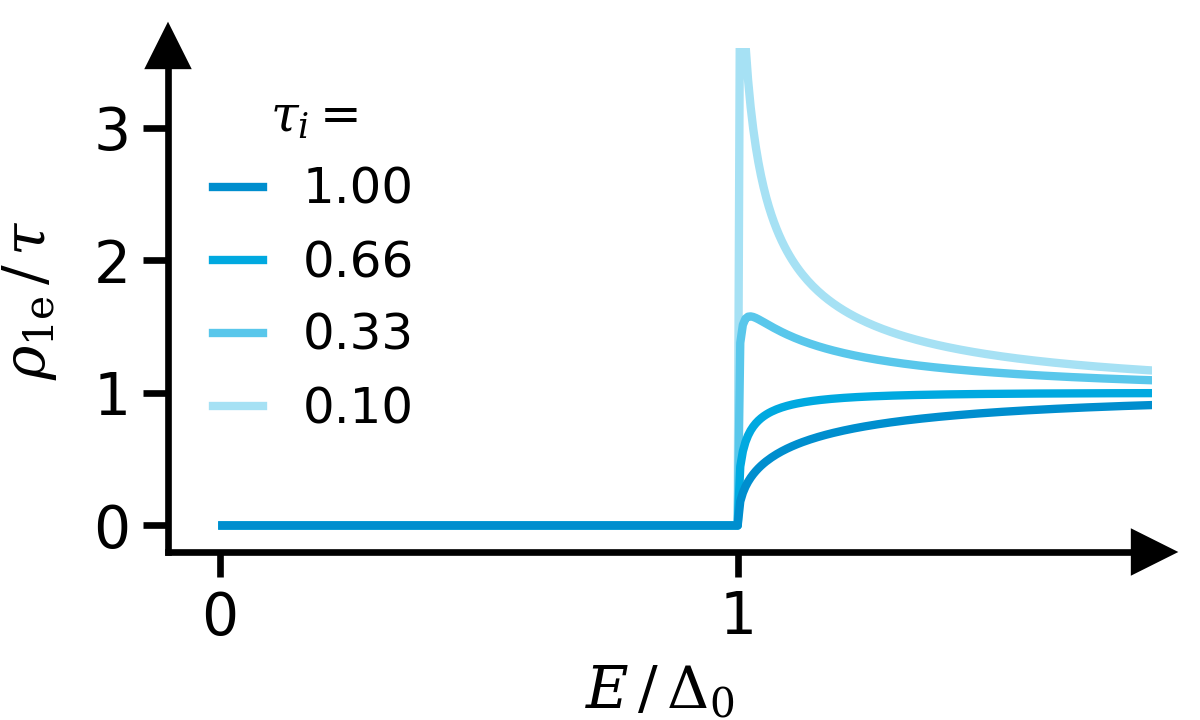

In [4]:
fig, ax = get_figure(figsize=(2, 1.2), subfigure=True)

for i, tau_i in enumerate(tau):
    ax.plot(
        V_mV / Delta_meV,
        N_1e[i, :],
        color=seeblau[i],
        zorder=10 - i,
        label=f"{tau_i:.2f}",
    )

ax.set_xlim(-0.1, 1.8)
ax.set_ylim(-0.2, 3.6)
ax.set_yticks([0, 1, 2, 3])
ax.set_xticks([0, 1])

ax.legend(
    title="$\\tau_i = $",
    handlelength=1.0,
    loc="upper left",
    frameon=False,
    fontsize=6,
    title_fontsize=6,
    ncols=1,
    columnspacing=1.0,
)

ylabel = "$\\rho_\\mathrm{1e}\\,/\\,\\tau$"
xlabel = "$E\\,/\\,\\Delta_0$"
title = "btk-1e-dos"

theory_layout(fig, ax, title, xlabel, ylabel)

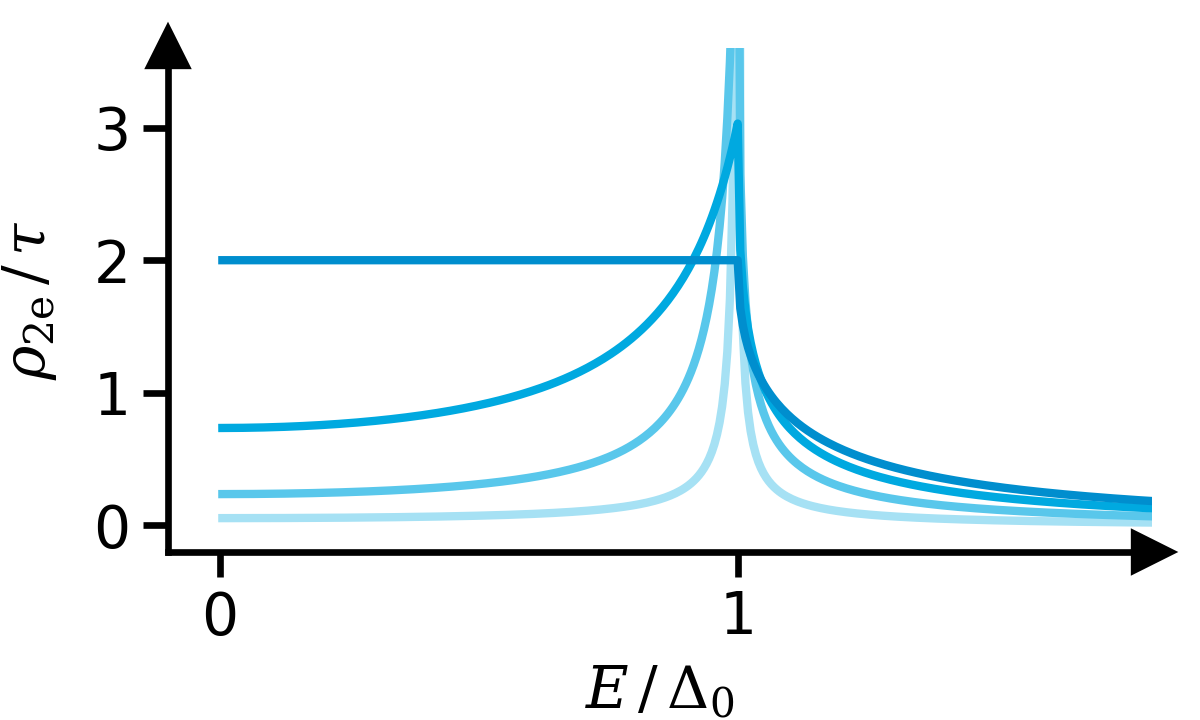

In [5]:
fig, ax = get_figure(figsize=(2, 1.2), subfigure=True)

for i, tau_i in enumerate(tau):
    ax.plot(
        V_mV / Delta_meV,
        N_2e[i, :],
        color=seeblau[i],
        zorder=10 - i,
        label=f"{tau_i:.1f}",
    )

ax.set_xlim(-0.1, 1.8)
ax.set_ylim(-0.2, 3.6)
ax.set_yticks([0, 1, 2, 3])
ax.set_xticks([0, 1])

ylabel = "$\\rho_\\mathrm{2e}\\,/\\,\\tau$"
xlabel = "$E\\,/\\,\\Delta_0$"
title = "btk-2e-dos"

theory_layout(fig, ax, title, xlabel, ylabel)

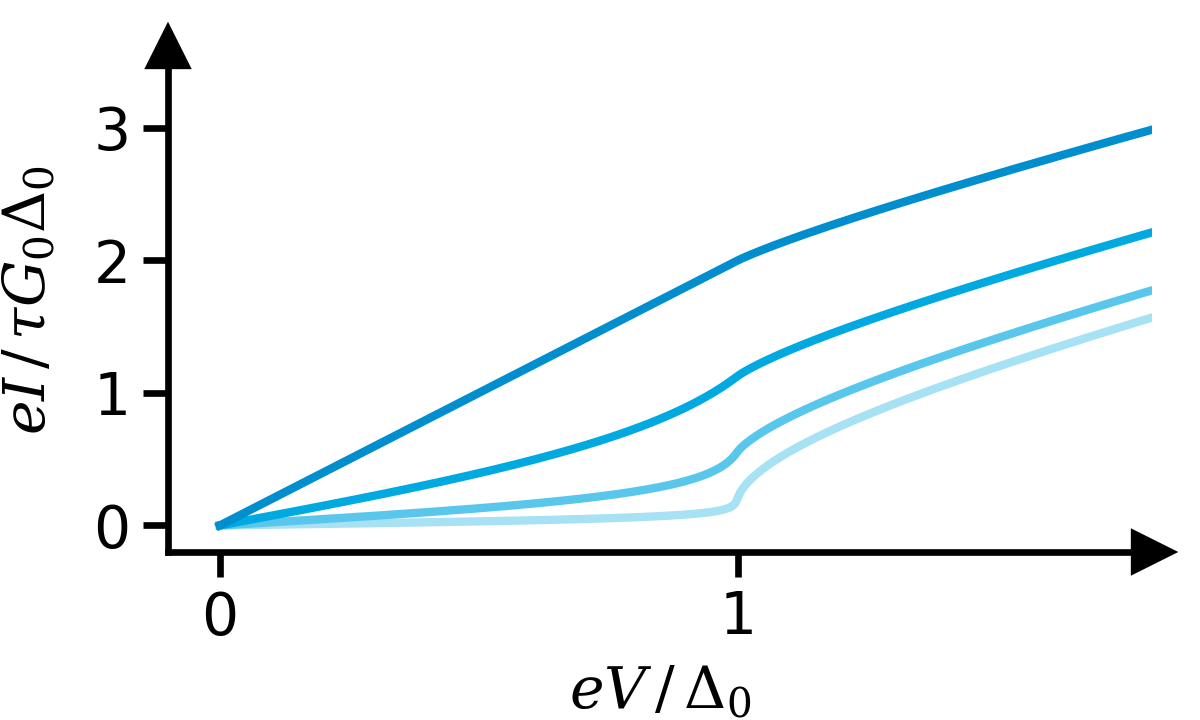

In [6]:
fig, ax = get_figure(figsize=(2, 1.2), subfigure=True)

for i, tau_i in enumerate(tau):
    ax.plot(
        V_mV / Delta_meV,
        I[i, :],
        color=seeblau[i],
        zorder=10 - i,
        label=f"{tau_i:.1f}",
    )

ax.set_xlim(-0.1, 1.8)
ax.set_ylim(-0.2, 3.6)
ax.set_yticks([0, 1, 2, 3])
ax.set_xticks([0, 1])

ylabel = "$eI\\,/\\,\\tau G_0\\Delta_0$"
xlabel = "$eV\\,/\\,\\Delta_0$"
title = "btk-iv"

theory_layout(fig, ax, title, xlabel, ylabel)

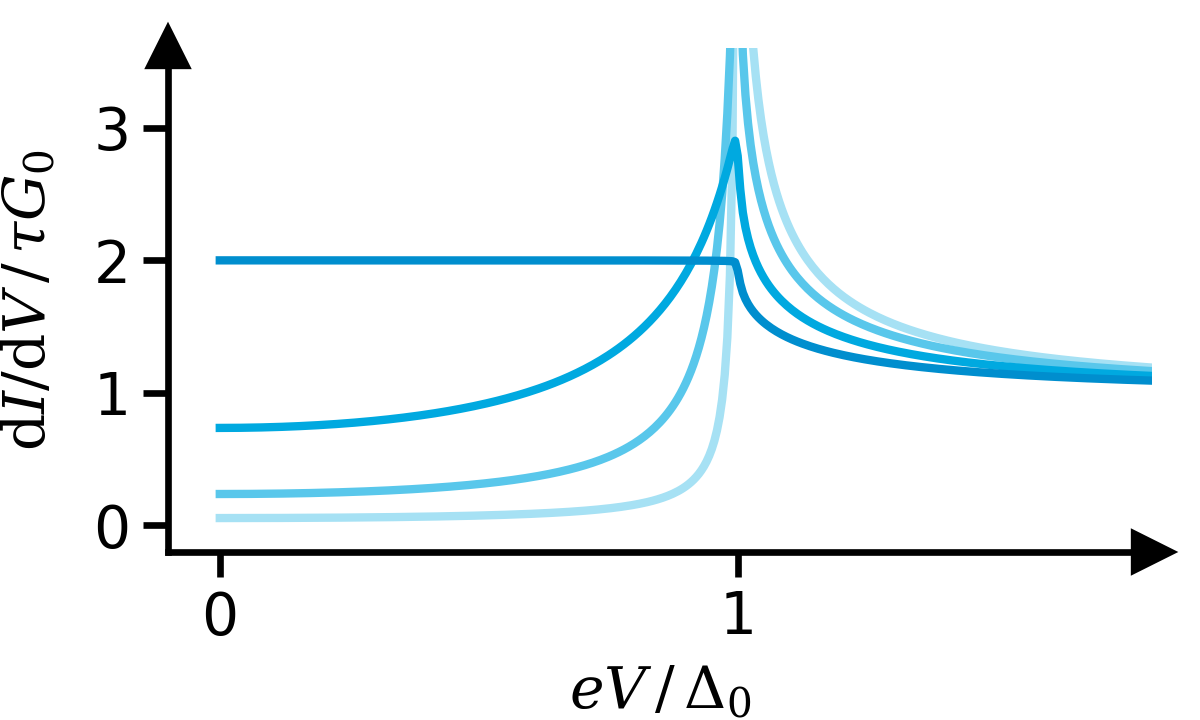

In [7]:
fig, ax = get_figure(figsize=(2, 1.2), subfigure=True)

for i, tau_i in enumerate(tau):
    ax.plot(
        V_mV / Delta_meV,
        dIdV[i, :],
        color=seeblau[i],
        zorder=10 - i,
        label=f"{tau_i:.1f}",
    )

ax.set_xlim(-0.1, 1.8)
ax.set_ylim(-0.2, 3.6)
ax.set_yticks([0, 1, 2, 3])
ax.set_xticks([0, 1])

ylabel = "$\\mathrm{d}I/\\mathrm{d}V\\,/\\,\\tau G_0$"
xlabel = "$eV\\,/\\,\\Delta_0$"
title = "btk-didv"

theory_layout(fig, ax, title, xlabel, ylabel)

# ABS Stuff

In [164]:
Delta_meV = 0.180
gamma_meV = 0.0
T_K = 1.2


tau = np.array([1.0, 0.95, 0.66, 0.33, 0.1])
phi = np.linspace(0, 2 * np.pi, 361)

pphi, ttau = np.meshgrid(phi, tau)

E_abs = np.sqrt(1 - ttau * np.sin(pphi / 2) ** 2)
E_abs_mV = E_abs * Delta_meV

K_T = np.tanh(E_abs_mV / (2 * k_B_meV * T_K))

I_nA = Delta_meV * ttau * np.sin(phi) / E_abs_mV * K_T

# I_nA = (
#     G_0_muS
#     * np.gradient(E_abs_mV, phi, axis=1)
#     * np.tanh(E_abs_mV / (2 * k_B_meV * T_K))
# )

/var/folders/kc/8fnzl3f94vxgl8w4wm3wfvk80000gn/T/ipykernel_12105/3642871010.py:16: RuntimeWarning: divide by zero encountered in divide
  I_nA = Delta_meV * ttau * np.sin(phi) / E_abs_mV * K_T
/var/folders/kc/8fnzl3f94vxgl8w4wm3wfvk80000gn/T/ipykernel_12105/3642871010.py:16: RuntimeWarning: invalid value encountered in multiply
  I_nA = Delta_meV * ttau * np.sin(phi) / E_abs_mV * K_T


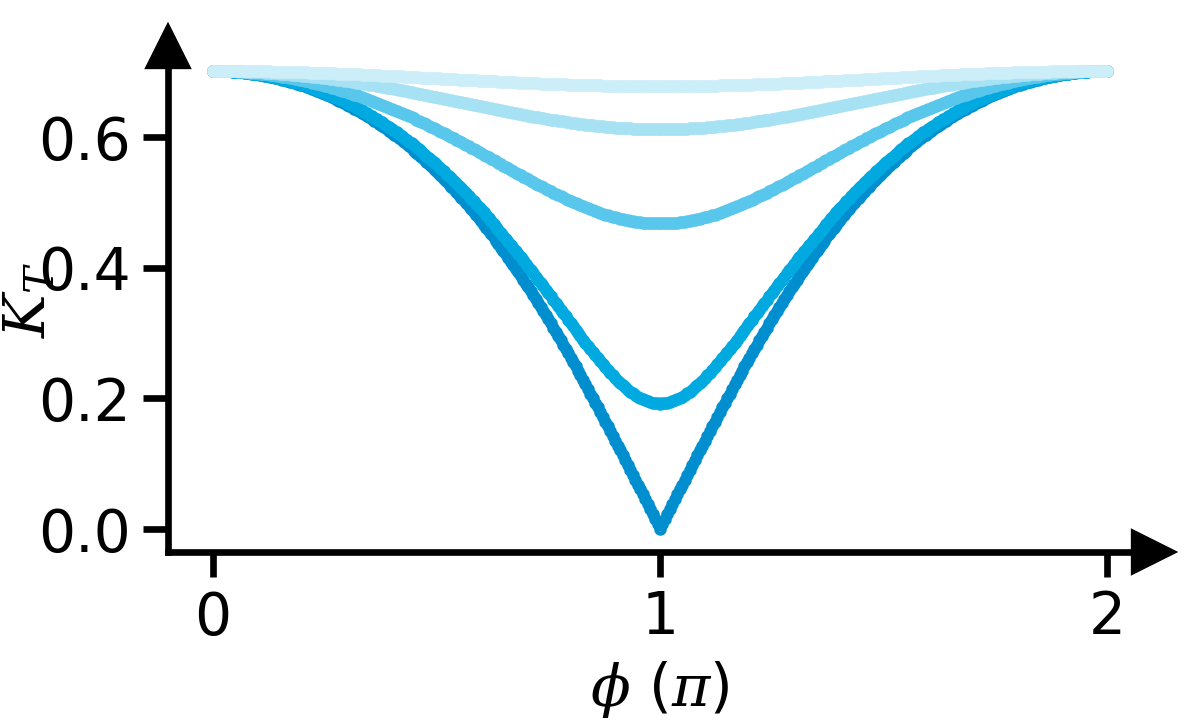

In [ ]:
fig, ax = get_figure(figsize=(2, 1.2), subfigure=True)
for i, tau_i in enumerate(tau):
    plt.plot(phi / (np.pi), K_T[i, :], ".", color=seeblau[i])

ax.set_xticks([0, 1, 2])
# ax.set_ylim(-2.2, 2.5)

# ax.set_yticks([0, 1, 2, np.pi/2])
# ax.grid()

ylabel = "$K_T$"
xlabel = "$\\phi$ ($\\pi$)"
title = None

theory_layout(fig, ax, title, xlabel, ylabel)

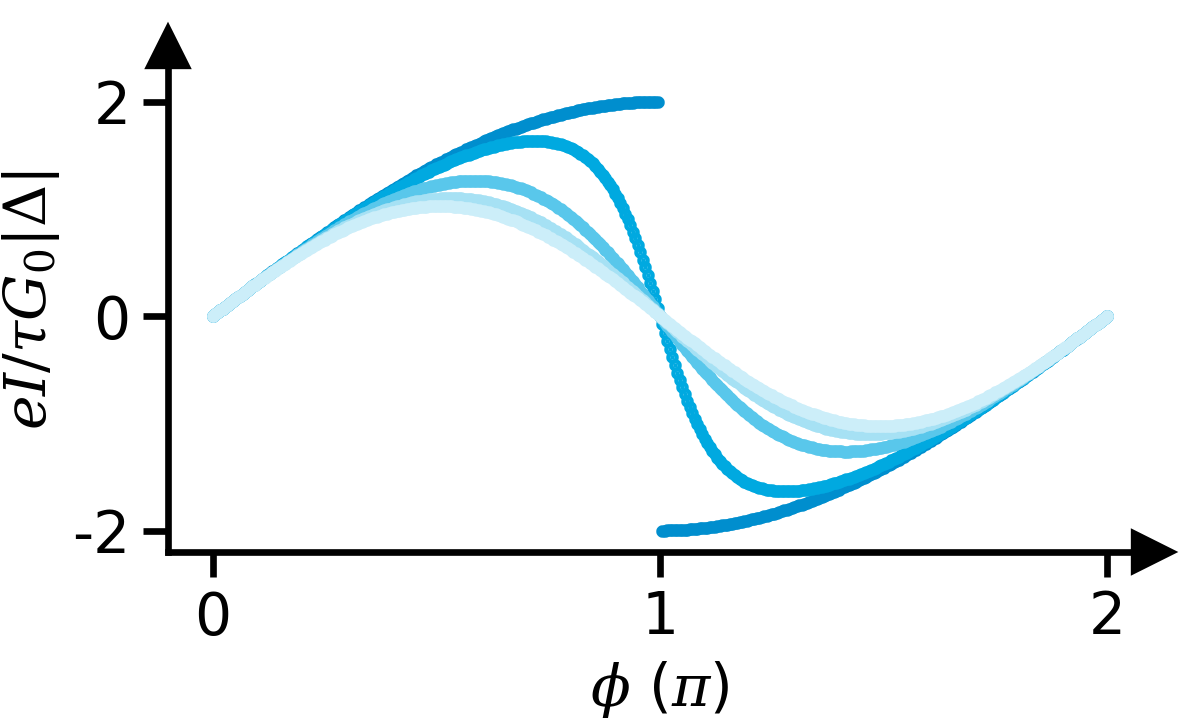

In [151]:
fig, ax = get_figure(figsize=(2, 1.2), subfigure=True)
for i, tau_i in enumerate(tau):
    plt.plot(phi / (np.pi), I_nA[i, :] / tau_i, ".", color=seeblau[i])

ax.set_xticks([0, 1, 2])
ax.set_ylim(-2.2, 2.5)

# ax.set_yticks([0, 1, 2, np.pi/2])
# ax.grid()

ylabel = "$eI / \\tau G_0 |\\Delta|$"
xlabel = "$\\phi$ ($\\pi$)"
title = "abs-Iphi"

theory_layout(fig, ax, title, xlabel, ylabel)

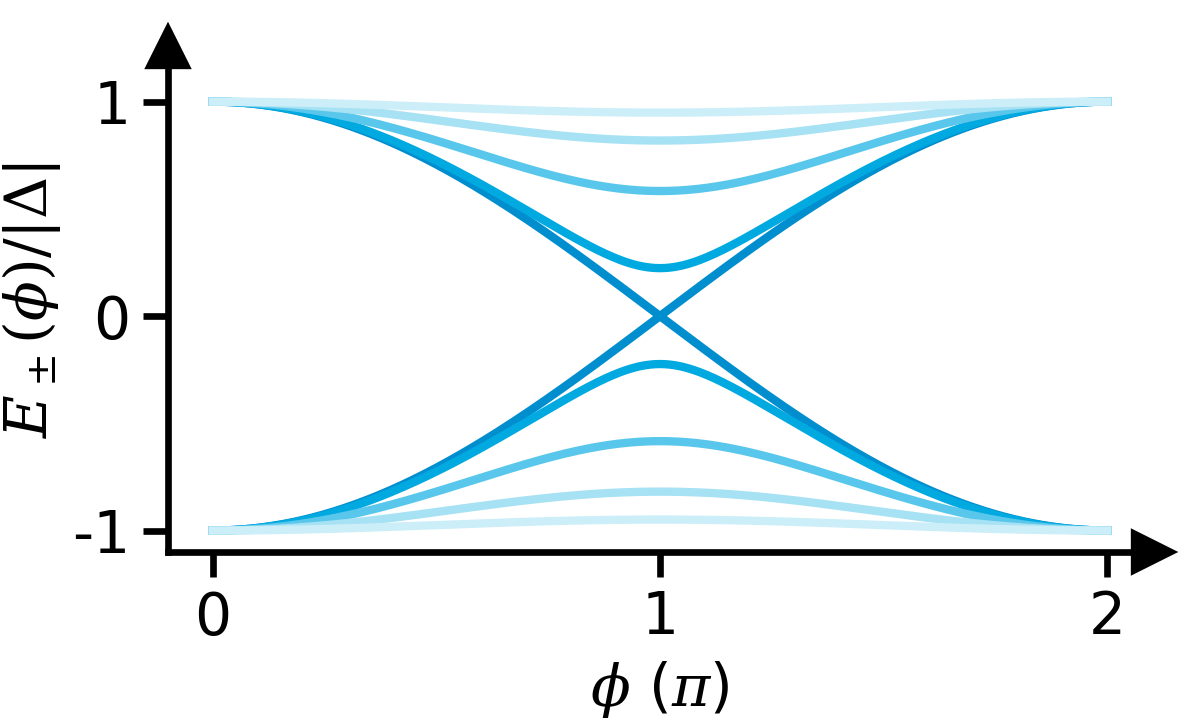

In [ ]:
fig, ax = get_figure(figsize=(2, 1.2), subfigure=True)
for i, tau_i in enumerate(tau):
    ax.plot(phi / (np.pi), E_abs[i, :], color=seeblau[i])
    ax.plot(phi / (np.pi), -E_abs[i, :], color=seeblau[i])

ax.set_xticks([0, 1, 2])
ax.set_ylim(-1.1, 1.25)

ylabel = "$E_\\pm(\\phi)/|\\Delta|$"
xlabel = "$\\phi$ ($\\pi$)"
title = "abs-Ephi"

theory_layout(fig, ax, title, xlabel, ylabel)

# ha-current

In [8]:
V_mV = np.linspace(0, 2.5 * Delta_meV, 501)
tau = np.array([1.0, 0.9, 0.66, 0.33, 0.1])
I = np.full((tau.shape[0], V_mV.shape[0]), np.nan)
dIdV = np.copy(I)

for i, tau_i in enumerate(tau):
    I[i, :] = get_I_nA_ha(
        V_mV=V_mV,
        Delta_meV=Delta_meV,
        tau=tau_i,
        T_K=T_K,
        gamma_meV=gamma_meV,
    ) / (tau_i * G_0_muS * Delta_meV)
dIdV = np.gradient(I, V_mV / Delta_meV, axis=1)
dIdV[0, 0] = 0

V_2_mV = np.linspace(2.5 * Delta_meV, 5 * Delta_meV, 101)
I_2 = np.full((tau.shape[0], V_2_mV.shape[0]), np.nan)
dIdV_2 = np.copy(I_2)

for i, tau_i in enumerate(tau):
    I_2[i, :] = get_I_nA_ha(
        V_mV=V_2_mV,
        Delta_meV=Delta_meV,
        tau=tau_i,
        T_K=T_K,
        gamma_meV=gamma_meV,
    ) / (tau_i * G_0_muS * Delta_meV)
dIdV_2 = np.gradient(I_2, V_2_mV / Delta_meV, axis=1)

colors = [
    seeblau100,
    seegrau100,
    seeblau65,
    seegrau65,
    seeblau35,
    seegrau35,
    seeblau20,
    seegrau20,
]
figsize = (1.3, 1.2)

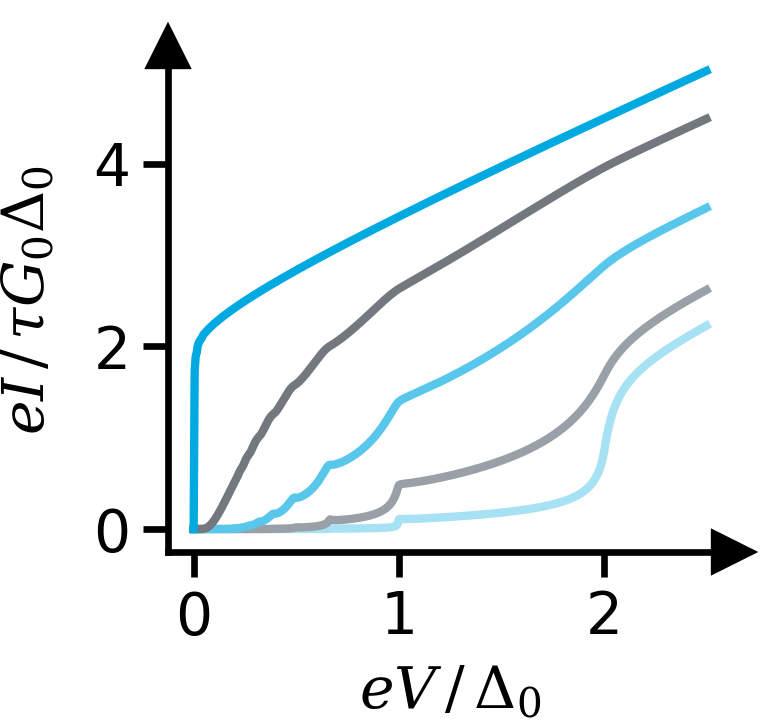

In [9]:
fig, ax = get_figure(figsize=figsize, subfigure=True)

for i, tau_i in enumerate(tau):
    ax.plot(
        V_mV / Delta_meV,
        I[i, :],
        color=colors[i],
        zorder=10 - i,
        label=f"{tau_i:.1f}",
    )

ylim = ax.get_ylim()

ylabel = "$eI\\,/\\,\\tau G_0\\Delta_0$"
xlabel = "$eV\\,/\\,\\Delta_0$"
title = "ha-iv"

theory_layout(fig, ax, title, xlabel, ylabel)

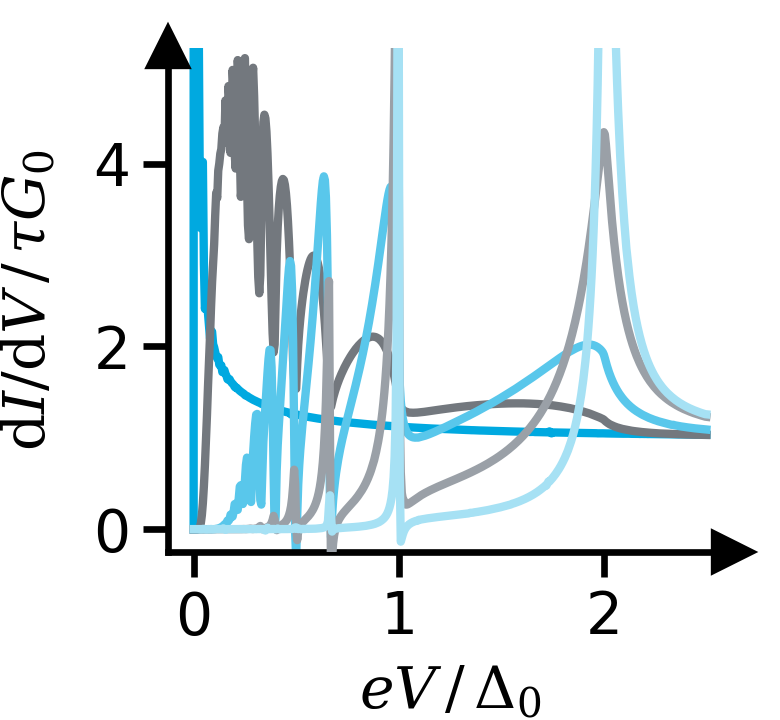

In [10]:
fig, ax = get_figure(figsize=figsize, subfigure=True)

for i, tau_i in enumerate(tau):
    ax.plot(
        V_mV / Delta_meV,
        dIdV[i, :],
        color=colors[i],
        zorder=i,
        label=f"{tau_i:.1f}",
    )

ax.set_ylim(ylim)

ylabel = "$\\mathrm{d}I/\\mathrm{d}V\\,/\\,\\tau G_0$"
xlabel = "$eV\\,/\\,\\Delta_0$"
title = "ha-didv"

theory_layout(fig, ax, title, xlabel, ylabel)

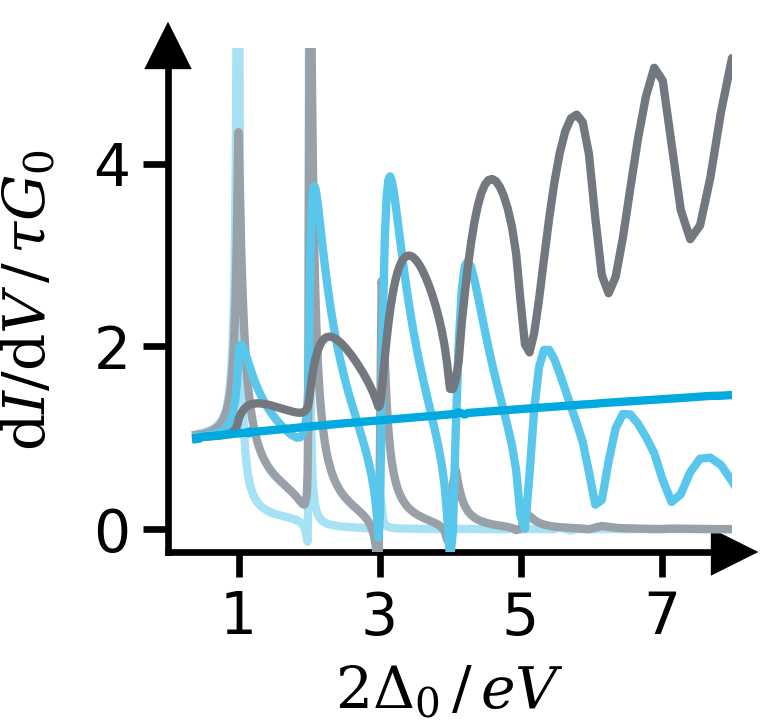

In [11]:
fig, ax = get_figure(figsize=figsize, subfigure=True)

for i, tau_i in enumerate(tau):
    ax.plot(
        2 * Delta_meV / np.concatenate((V_mV[1:], V_2_mV)),
        np.concatenate((dIdV[i, 1:], dIdV_2[i, :])),
        color=colors[i],
        zorder=10 - i,
        label=f"{tau_i:.1f}",
    )

ax.set_ylim(ylim)
ax.set_xlim(0, 8)

# ax.set_xticks([1, 3, 5, 7], labels=["1","1/3", "1/5", "1/7"])
# xlabel = "$eV\\,/\\,2\\Delta_0$"

ax.set_xticks([1, 3, 5, 7])
xlabel = "$2\\Delta_0\\,/\\,eV$"

ylabel = "$\\mathrm{d}I/\\mathrm{d}V\\,/\\,\\tau G_0$"
title = "ha-didv-inv"

theory_layout(fig, ax, title, xlabel, ylabel)

# fcs-current

In [ ]:
V = np.linspace(0, 3.5, 351)
tau = np.array([1.0, 0.9, 0.66, 0.33, 0.1])
# tau = np.array([.1, .33, .66, .9, 1.])
M = np.arange(1, 11, 1)

I = np.empty((tau.shape[0], V.shape[0], M.shape[0] + 1))

Delta_meV = 0.180
gamma_meV = 0.0
T_K = 0.0
V_mV = V * Delta_meV

for i, tau_i in enumerate(tau):
    I_nA = get_I_nA_fcs(
        V_mV=V_mV,
        Delta_meV=Delta_meV,
        tau=tau_i,
        T_K=T_K,
        gamma_meV=gamma_meV,
    )
    I[i, :, :] = I_nA / (tau_i * G_0_muS * Delta_meV)
dIdV = np.gradient(I, V, axis=1)

I[0, 12, 0] = (I[0, 11, 0] + I[0, 13, 0]) / 2
I[0, 11, 0] = (I[0, 10, 0] + I[0, 12, 0]) / 2
I[1, 11, 0] = (I[1, 10, 0] + I[1, 13, 0]) / 2
I[1, 12, 0] = (I[1, 11, 0] + I[1, 13, 0]) / 2

# I[0,11,3] = (I[1,10,3]+I[1,13,3])/2
# I[0,12,3] = (I[1,11,3]+I[1,13,3])/2
# I[0,12,4] = (I[0,11,4]+I[0,13,4])/2
# I[0,11,4] = (I[0,10,4]+I[0,12,4])/2

cached values: 351/351
cached values: 351/351
cached values: 351/351
cached values: 351/351
cached values: 351/351


/Users/oliver/.pyenv/versions/3.13.3/lib/python3.13/site-packages/colorspacious/ciecam02.py:333: RuntimeWarning: invalid value encountered in divide
  t = (C


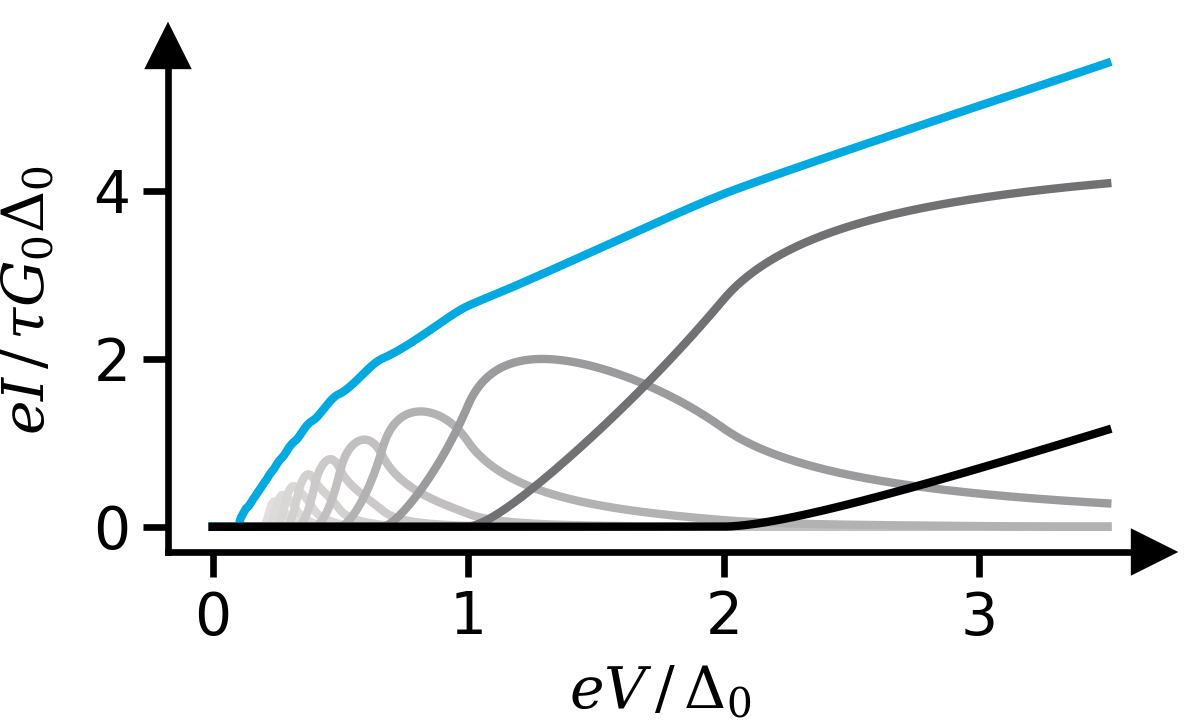

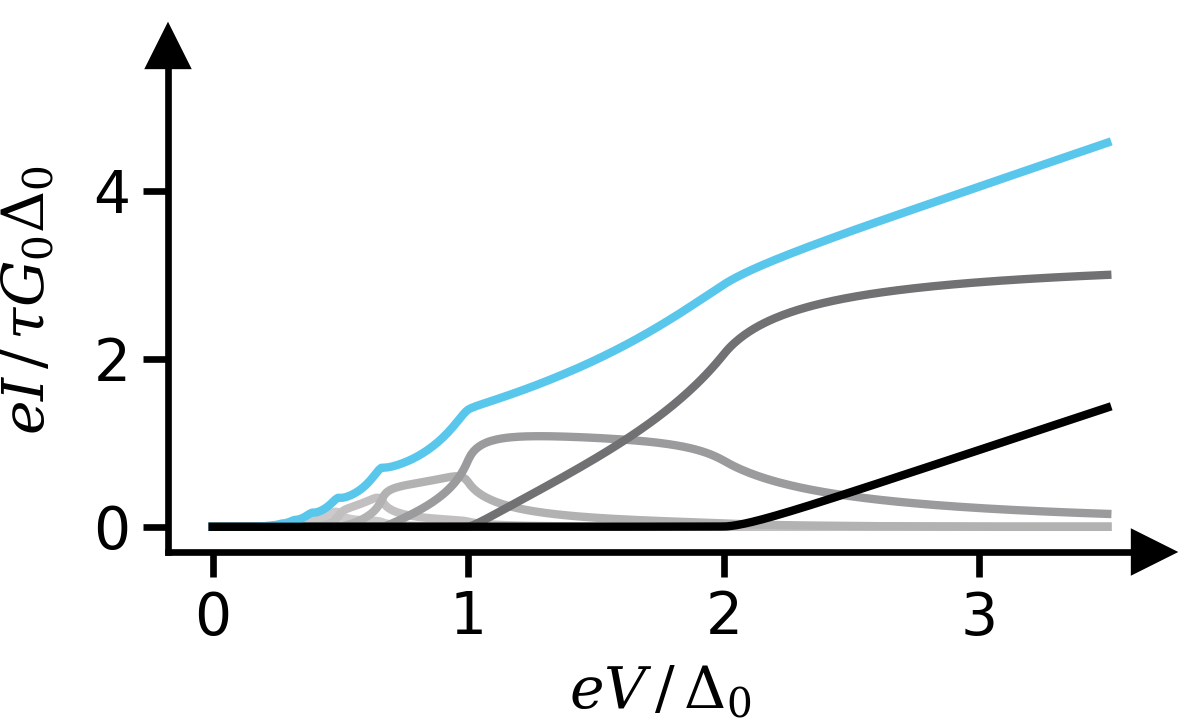

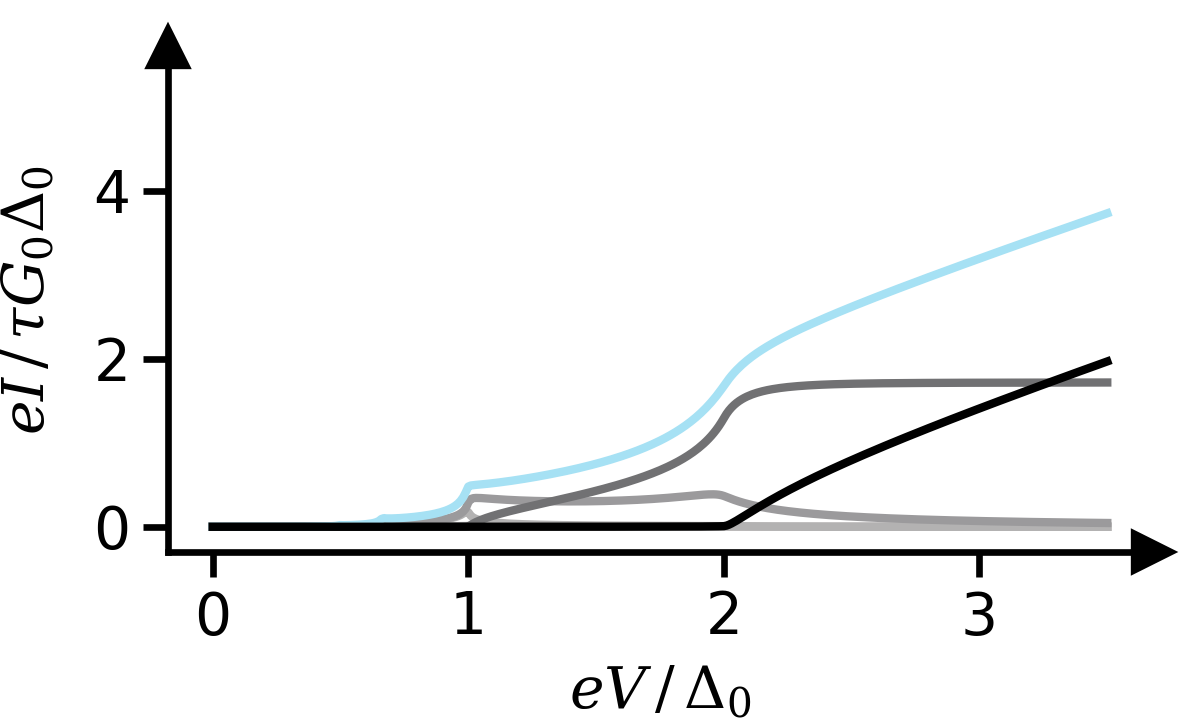

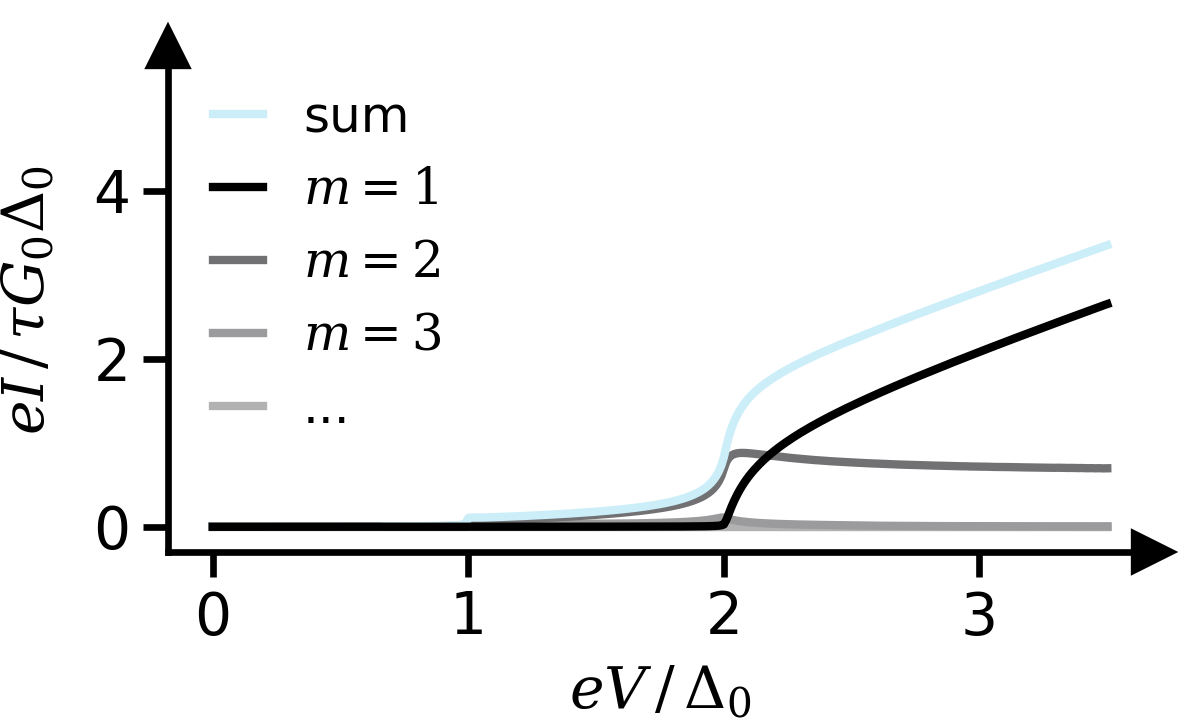

In [140]:
%matplotlib inline

figsize=(2, 1.2)
grey = cmap_tinted_black_to_white(seegrau100)
print(grey)
for i_tau, tau_i in enumerate(tau):

    if i_tau >= 1:
        fig, ax = get_figure(figsize=figsize, subfigure=True)

        ax.plot(
            V,
            I[i_tau, :, 0],
            # color=seeblau100,
            color=seeblau[i_tau],
            zorder=10,
            label="sum",
        )

        for i, m in enumerate(M):
            ax.plot(
                V,
                I[i_tau, :, m],
                color=grey(1-1/(i+1)),
                zorder=10 - i,
                label=f"{m}",
            )

        if tau_i == tau[-1]:
            ax.legend(
                ["sum", "$m=1$", "$m=2$", "$m=3$", "..."],
                handlelength=1.0,
                loc="upper left",
                frameon=False,
                fontsize=6,
                title_fontsize=6,
                ncols=1,
                columnspacing=1.0,
            )

        ax.set_ylim(-.3, 5.7)

        ylabel = "$eI\\,/\\,\\tau G_0\\Delta_0$"
        xlabel = "$eV\\,/\\,\\Delta_0$"
        title = f"fcs-{int(tau_i*100):03d}"

        theory_layout(fig, ax, title, xlabel, ylabel)

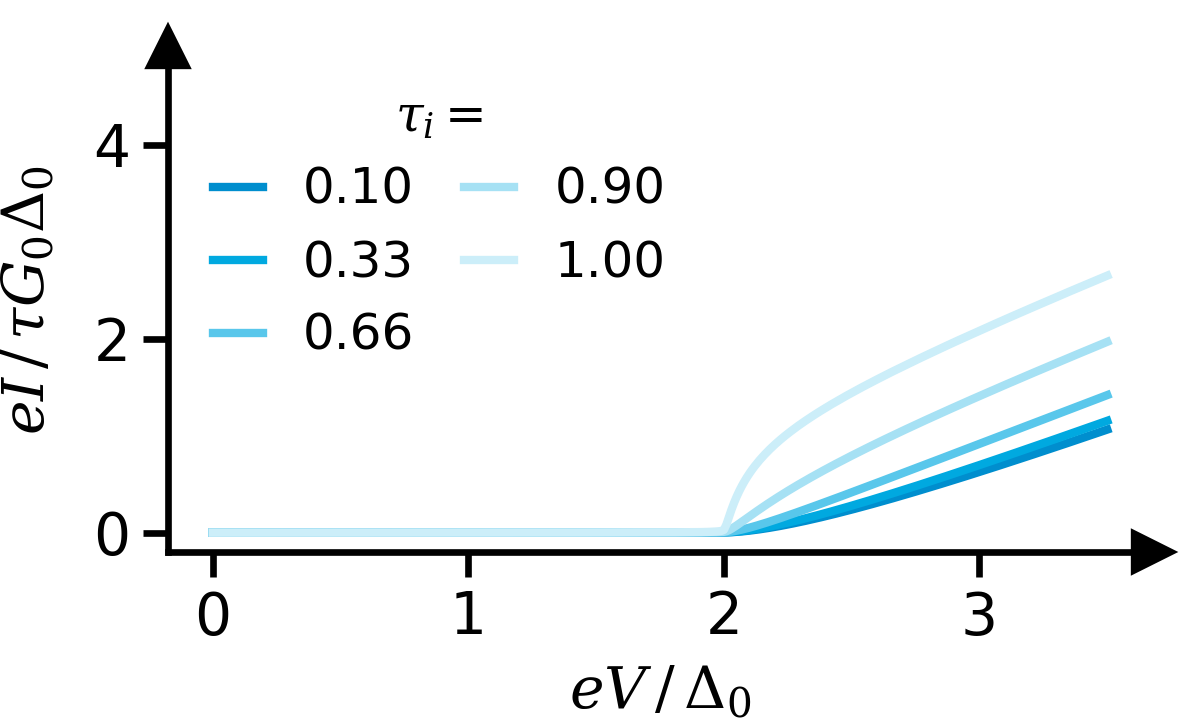

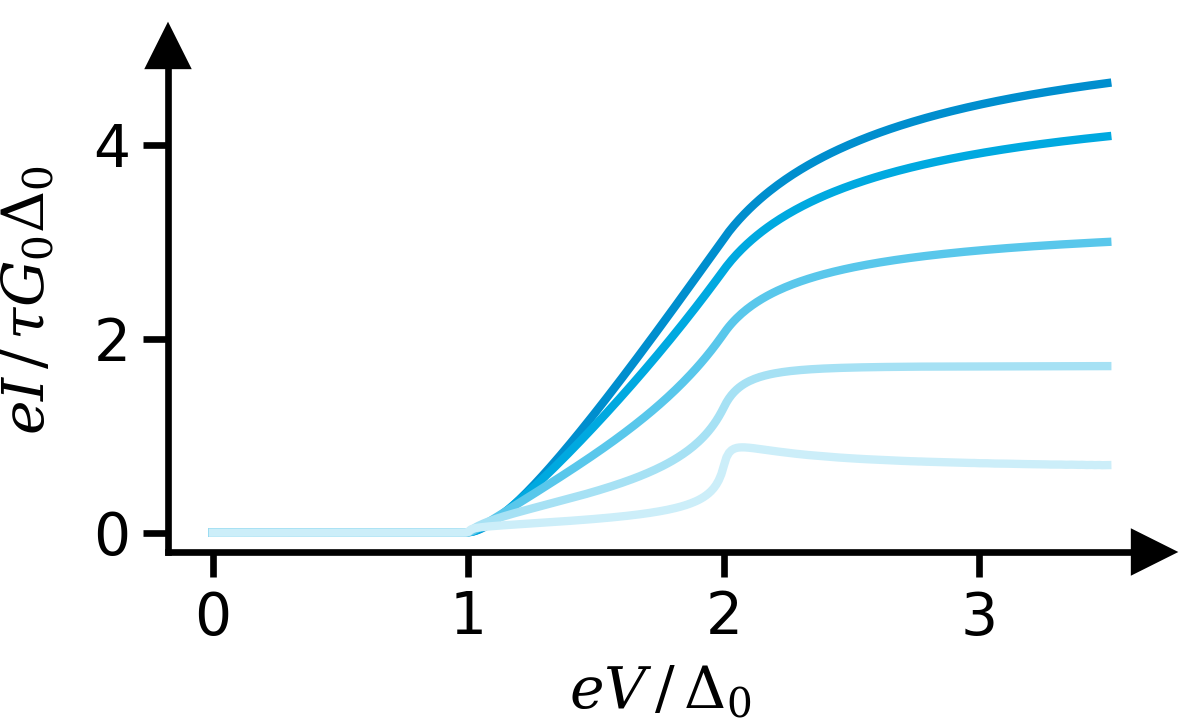

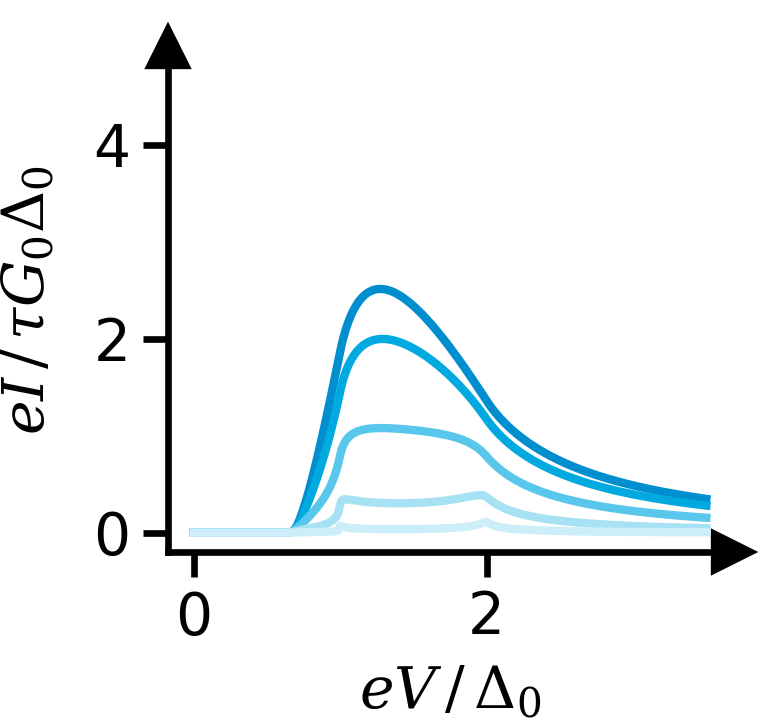

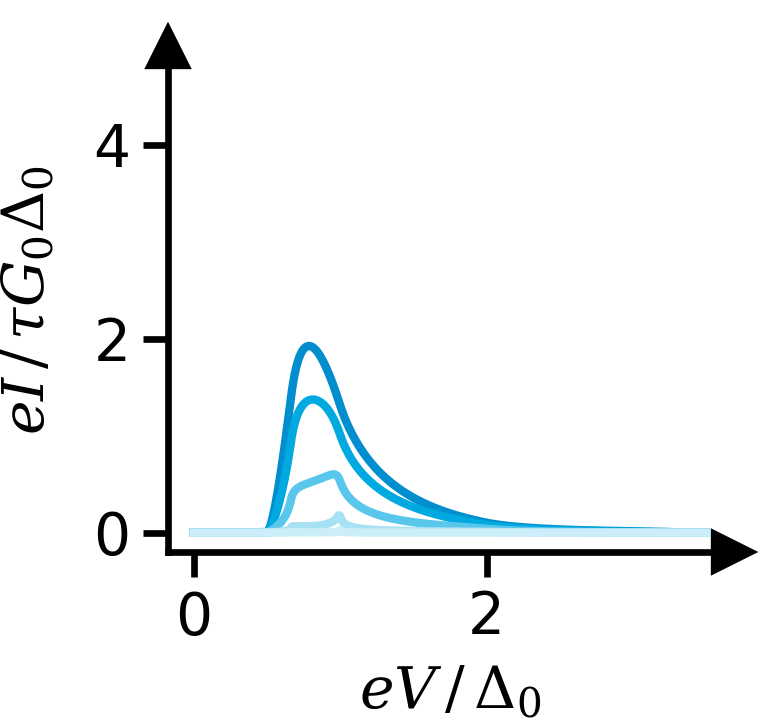

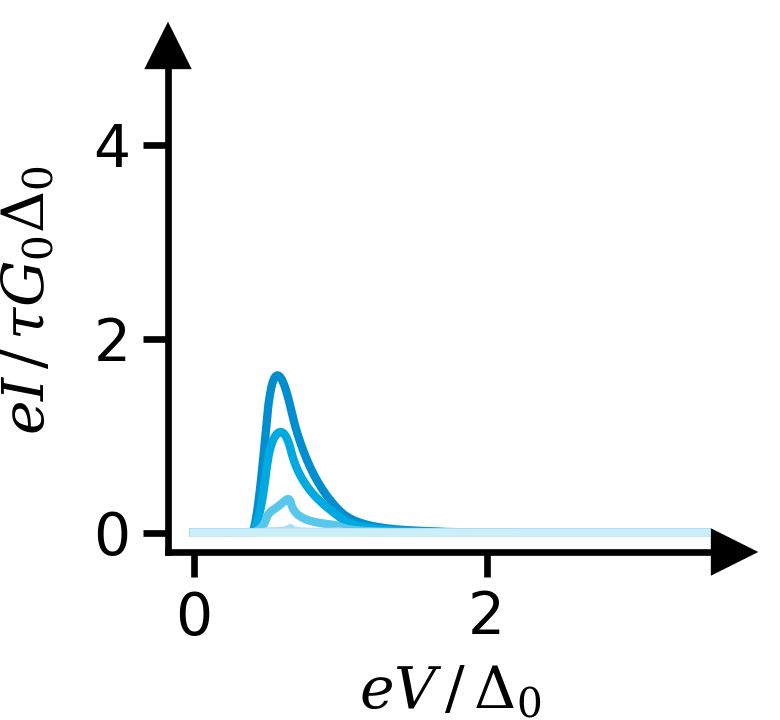

In [142]:
%matplotlib inline

figsize=(2, 1.2)
figsize2=(1.3, 1.2)
for i_m in range(1, 6):

    if i_m>=3:
        fig, ax = get_figure(figsize=figsize2, subfigure=True)
    else:
        fig, ax = get_figure(figsize=figsize, subfigure=True)

    for i_tau, tau_i in enumerate(np.flip(tau)):
        # i_tau = len(tau)-i_tau-1
        ax.plot(
            V,
            I[i_tau, :, i_m],
            color=seeblau[i_tau],
            zorder=10,
            label=f"{tau_i:.2f}",
        )


    if i_m == 1:
        ax.legend(
            title="$\\tau_i = $",
            handlelength=1.0,
            loc="upper left",
            frameon=False,
            fontsize=6,
            title_fontsize=6,
            ncols=2,
            columnspacing=1.0,
        )

    ax.set_ylim(-.2, 5)

    ylabel = "$eI\\,/\\,\\tau G_0\\Delta_0$"
    xlabel = "$eV\\,/\\,\\Delta_0$"
    title = f"fcs-m{i_m}"

    theory_layout(fig, ax, title, xlabel, ylabel)

# PAMAR